Proceso Desarrollo UD01


ENTREGA 1: Responde a estas preguntas:
    

    a) ¿Cómo se llama el paquete donde se encuentran los datasets que tiene la librería?


Se llama sklearn.datasets, en la librería scikit-learn

    b) ¿Qué características tienen los Toy dataset?

Sus características son ser datos y conjuntos de datos pequeños, bien organizados normalmente y que sirven para aprender con machine learning

    c) ¿Qué otros tipos de datasets tiene scikit-learn?

Tiene datasets de conjuntos de datos reales pequeños, grandes y algunos generados

    d) Busca información del dataset de tipo Toy llamado Iris. Responde a estas preguntas sobre él:
    • Escribe las sentencias con las que se cargaría el dataset Iris en un programa en
    Python.
    • ¿Cuántos ejemplos tiene?
    • ¿Para qué tipo de problemas se puede utilizar?
    • ¿Cuántas clases diferentes tiene y cómo se llaman?
    • ¿Qué porcentaje de datos o ejemplos de cada clase hay?
    

Se cargaría así:
from sklearn.datasets import load_iris
data = load.iris()

Tiene 150 ejemplos
Se puede utilizar para problemas de clasificación y de análisis de datos exploratorio

Las diferentes clases son Setosa, Versicolor y Virginica

El porcentaje sería de unos 33.33 % teniendo en cuenta que cada clase tiene 50 ejemplos y son 150

    e) Escribe las sentencias con las que:
    - Descargarías un dataset de openml.org (mira el apartado 7.4.1).
    - Haz un programa en Python que descargue uno e imprima:
    - Cuántos ejemplos tiene.
    - Cuántas características tiene cada ejemplo
    - Imprime los datos de los primeros 5 ejemplos

In [ ]:
from sklearn.datasets import fetch_openml

#Descargarlo
dataset = fetch_openml(data_id=50)
data, target = dataset.data, dataset.target


    ACTIVIDAD 2: ANALIZAR DATASET “BREAST CANCER WISCONSIN”.


    Las características de cada ejemplo se han calculado a partir de una imagen digitalizada de una masa
    tumoral de cáncer de mama. Describen características de la zona tumoral de la imagen. De cada
    característica se añade la media ‘mean … ’, el error estándar ‘standard error …’ y el 'worst …' o media
    de los 3 valores mayores, generando un total de 30 características. Por ejemplo las mediciones del
    radio de la masa son: 'mean radius' (radio medio), 'standard error of the radius' (error estándar del
    radio) y 'worst radius' (mayor tri-media). Todas las características se registran con 4 dígitos
    significativos. La columna target tiene dos clases (dos posibles valores) que corresponden a las
    etiquetas negativa (“Benigno”) y positivo (“Maligno”). Recordaros que maligno en el contexto médico
    equivale a que conduce a la muerte. Para realizar las tareas necesitarás todos estos paquetes que
    puedes importar ya o a medida que los vayas necesitando, como prefieras: 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn import datasets
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

    Paso 2.1. Cargamos el dataset de sklearn y describimos las características. Ten en cuenta que el dataset
    es un diccionario Python con varias claves y en cada clave tendrá algo. Primero miramos las claves

In [2]:
#Imprimimos las descripciones
datos = datasets.load_breast_cancer()
print(datos.DESCR) #detailed description
print("---- keys del dataset \"breast cancer\":", datos.keys() )

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

    Y a continuación miramos las proporciones de cada clase, creamos un DataFrame de Pandas y se mapea
    target a valores 0 y 1. Una vez construido el DataFrame lo describimos.

In [ ]:
#Debemos Remapear el target para que aparezcan valores numéricos:
#Benigno = 0 (clase negativa)
#Maligno = 1 (clase positiva)
li_clases = [datos.target_names[1], datos.target_names[0]]
li_target = [1 if x==0 else 0 for x in list(datos.target)]
li_predictoras = list(datos.feature_names)
print(" ---- El target tiene 2 clases:", li_clases)
print(f"---- Su distribución en un total de {len(li_target)} valores es:")
print(pd.Series(li_target).value_counts())
df_todas = pd.DataFrame(datos.data[:,:], columns=li_predictoras)
print("Describimos las 6 primeras columnas del dataframe:")
print(df_todas.iloc[:,:6].describe().to_string())

 ---- El target tiene 2 clases: [np.str_('benign'), np.str_('malignant')]
---- Su distribución en un total de 569 valores es:
0    357
1    212
Name: count, dtype: int64
Describimos las 6 primeras columnas del dataframe:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness
count     569.0000      569.0000         569.000   569.0000         569.0000          569.0000
mean       14.1273       19.2896          91.969   654.8891           0.0964            0.1043
std         3.5240        4.3010          24.299   351.9141           0.0141            0.0528
min         6.9810        9.7100          43.790   143.5000           0.0526            0.0194
25%        11.7000       16.1700          75.170   420.3000           0.0864            0.0649
50%        13.3700       18.8400          86.240   551.1000           0.0959            0.0926
75%        15.7800       21.8000         104.100   782.7000           0.1053            0.1304
max        28.1100 

    ENTREGA 2: Responde a estas preguntas:


    a) ¿Qué hace la sentencia? df_todas.iloc[:, :6]


Devuelve un subconjunto con todas las filas, pero limitado a las primeras 6 columnas en orden de aparición

    b) ¿Hay valores ausentes en alguna columna?


In [8]:
#Comprobar valores ausentes
missing_values = df_todas.isnull().sum()
print("Valores ausentes por columna:")
print(missing_values)


Valores ausentes por columna:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


    c) ¿Hay el mismo número de casos benignos que malignos? ¿Cuál es el % de cada uno?

No, hay más número de casos benignos. El porcentaje sería de 62.74 % para casos benignos y 37.26 % para casos malignos

Benignos
357 / 569 * 100 = 62.74 %
Malignos
100 - 62.74 = 37.26 %

In [10]:
#También podemos sacarlo así

count_benignos = li_target.count(0)
count_malignos = li_target.count(1)

#Calculamos el porcentaje de cada clase
total = len(li_target)
porcentaje_benignos = (count_benignos / total) * 100
porcentaje_malignos = (count_malignos / total) * 100

#Imprimimos los resultados
print(f"Número de casos benignos: {count_benignos}")
print(f"Número de casos malignos: {count_malignos}")
print(f"Porcentaje de casos benignos: {porcentaje_benignos:.2f}%")
print(f"Porcentaje de casos malignos: {porcentaje_malignos:.2f}%")

Número de casos benignos: 357
Número de casos malignos: 212
Porcentaje de casos benignos: 62.74%
Porcentaje de casos malignos: 37.26%


    Paso 2.2. Dividimos el dataset en datos de train y datos de test: 


In [12]:
RATIO_PARA_TEST = 0.5           # divismos en dos partes iguales
X = df_todas
y = pd.Series(li_target)
X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size=RATIO_PARA_TEST)

print(f"X_train_0.shape {X_train_0.shape} e y_train-.shape {y_train.shape}")
print(f"X_test_0.shape {X_test_0.shape} e y_test_shape {y_test.shape}")

X_train_0.shape (284, 30) e y_train-.shape (284,)
X_test_0.shape (285, 30) e y_test_shape (285,)


    ACTIVIDAD 3: REDUCIR CARACTERÍSTICAS.


    Usamos dos técnicas del método selección de características:
    1. Reducción Univariada (Eliminar bajas correlaciones con el target).
    2. Reducción basada colinearidad (para cada pareja de predictoras, si tienen mucha correlación, nos
    quedamos con la más correlacionada con el target y quitamos la otra).

    Paso 3.1. Primero hacemos un mapa de calor de las correlaciones:

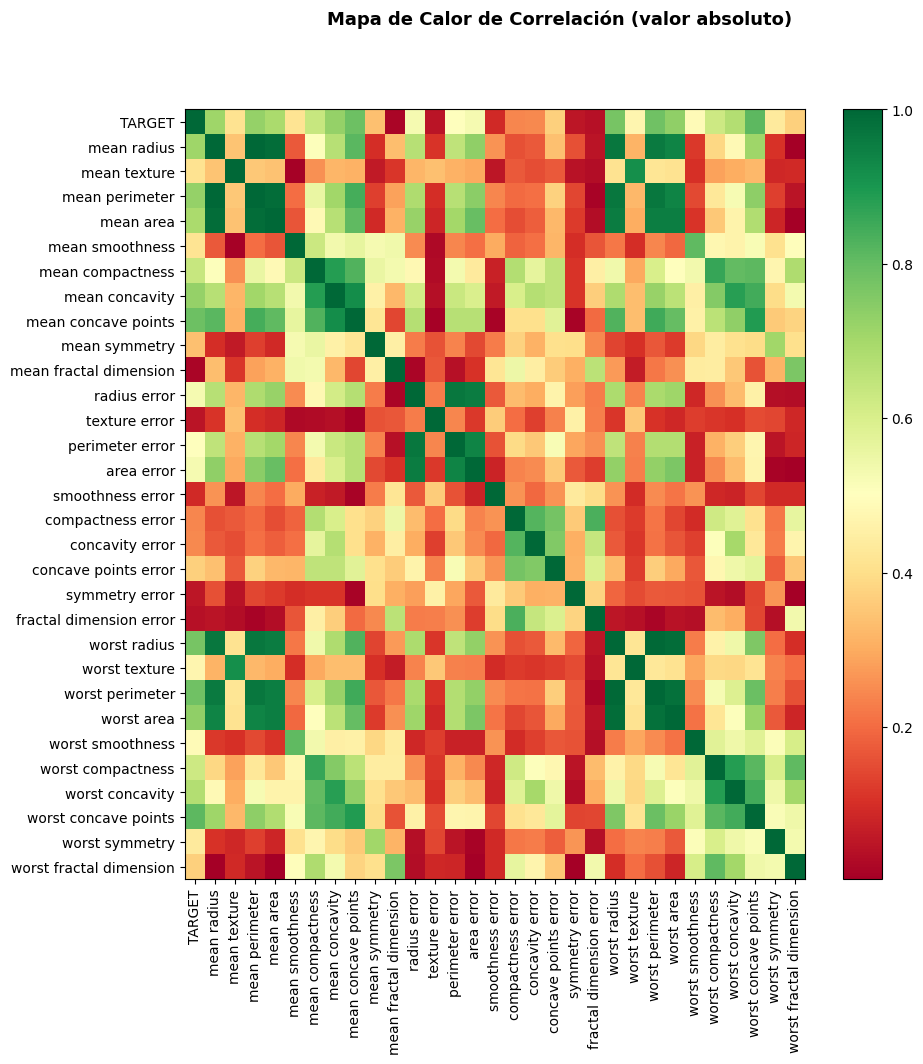

In [13]:
def matriz_correlaciones(y, X, se_dibuja=False):
    # Calcula y dibuja la matriz de correlaciones
    # Devuelve:
    # yX - datos concatenados
    # yX_corr - matriz de correlaciones, correlación de Pearson entre [-1, +1]
    # yX_abs_corr - matriz de correlaciones en valor absoluto
    yX = pd.concat([y, X], axis=1)
    yX = yX.rename(columns={0: 'TARGET'})  # cambiar nombre de primera columna
    # Calcula la matriz y convierte a DataFrame para visualizar mejor
    yX_corr = yX.corr(method='pearson')
    yX_abs_corr = np.abs(yX_corr)  # Convierte a valor absoluto
    if se_dibuja:
        plt.figure(figsize=(10, 10))
        plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns)
        plt.suptitle('Mapa de Calor de Correlación (valor absoluto)', fontsize=13, fontweight='bold')
        plt.show()
    return yX, yX_corr, yX_abs_corr

# Calcular y visualizar la matriz de correlaciones de los datos de entrenamiento
yX, yX_corr, yX_abs_corr = matriz_correlaciones(y_train, X_train_0, se_dibuja=True)


    ENTREGA 3: Responde a estas preguntas:


    1. Entrega el gráfico de la matriz de correlaciones


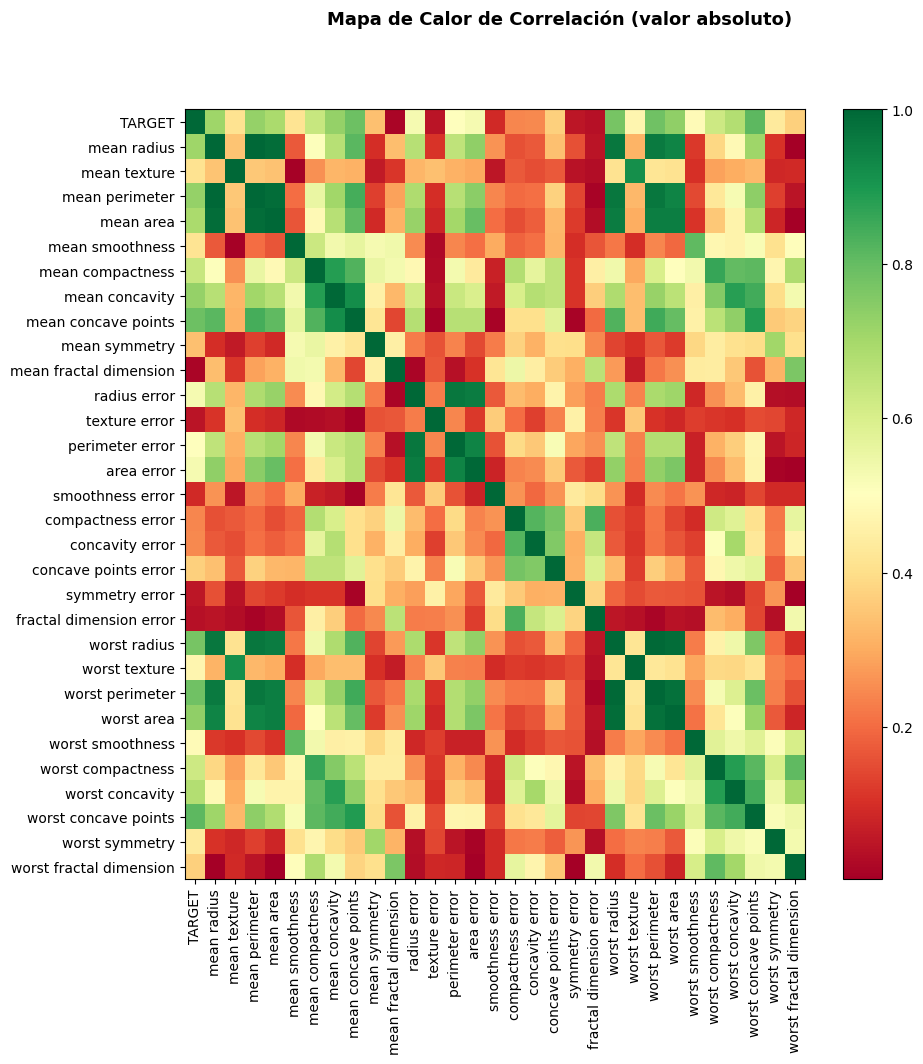

In [14]:
#Suponiendo que y_train y X_train_0 están definidos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def matriz_correlaciones(y, X, se_dibuja=False):
    yX = pd.concat([y, X], axis=1)
    yX = yX.rename(columns={0: 'TARGET'})  # Renombrar la columna objetivo
    yX_corr = yX.corr(method='pearson')  # Calcular correlación
    yX_abs_corr = np.abs(yX_corr)  # Valor absoluto de la matriz
    if se_dibuja:
        plt.figure(figsize=(10, 10))
        plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns)
        plt.suptitle('Mapa de Calor de Correlación (valor absoluto)', fontsize=13, fontweight='bold')
        plt.show()
    return yX, yX_corr, yX_abs_corr

#Asumiendo y_train y X_train_0 disponibles
yX, yX_corr, yX_abs_corr = matriz_correlaciones(y_train, X_train_0, se_dibuja=True)


    2. Una columna influye en el target si su correlación está cerca del +1 o del -1. Como hemos
    dibujado el valor absoluto en los datos, solo puede estar cera del +1 si tiene influencia o del 0 si
    no la tiene. Si una columna tiene baja correlación con el target, significa que tienen poca
    relación y por tanto no tendrá apenas influencia sobre él, no le afecta. Por tanto eliminarla no
    supone una gran pérdida de información para los algoritmos de aprendizaje. Examinando
    visualmente la matriz ¿Podrías indicar los nombres de las características que están en ese caso,
    es decir, tienen una correlación cercana a cero con el target.

Para identificar las características con baja correlación, cercana a 0 usaremos la matriz yX_corr

In [16]:
#Filtrar columnas con correlación baja con el target
low_corr_features = yX_corr['TARGET'].abs().loc[yX_corr['TARGET'].abs() < 0.1].index.tolist()
print(f"Características con baja correlación con el target: {low_corr_features}")


Características con baja correlación con el target: [np.str_('mean fractal dimension'), np.str_('texture error'), np.str_('smoothness error'), np.str_('symmetry error'), np.str_('fractal dimension error')]


    3. Examinando visualmente la matriz, ¿es simétrica respecto a la diagonal? Es decir
    (caracteristica1 influye en característica2) lo mismo que (característica2 en característica1)?

Sí, la matriz de correlación siempre simétrica ya que X1 y X2 son iguales a la correlación entre X2 y X1. Se puede confirmar así:

In [17]:
#Verificar si la matriz es simétrica
is_symmetric = np.allclose(yX_corr, yX_corr.T)
print(f"La matriz es simétrica: {is_symmetric}")


La matriz es simétrica: True


    4. ¿Qué característica guarda una fuerte correlación con “mean radius” y “mean perimeter”?

La característica que guarda una fuerte correlación se puede sacar analizando directamente las filas o columnas de la matriz de correlación asociadas a estas variables

In [18]:
#Características con fuerte correlación con 'mean radius'
strong_corr_radius = yX_corr['mean radius'].abs().nlargest(3).index.tolist()

#Características con fuerte correlación con 'mean perimeter'
strong_corr_perimeter = yX_corr['mean perimeter'].abs().nlargest(3).index.tolist()

print(f"Fuerte correlación con 'mean radius': {strong_corr_radius}")
print(f"Fuerte correlación con 'mean perimeter': {strong_corr_perimeter}")


Fuerte correlación con 'mean radius': [np.str_('mean radius'), np.str_('mean perimeter'), np.str_('mean area')]
Fuerte correlación con 'mean perimeter': [np.str_('mean perimeter'), np.str_('mean radius'), np.str_('mean area')]


    Paso 3.2. Aplicamos reducción univariada:


In [19]:
#Reducción univariada
CORRELACION_MIN = 0.1

#Ordenamos características por su correlación con el target
s_corr_target = yX_abs_corr['TARGET']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

#Solo usamos columnas con correlación > 0.1
s_low_correlation_ftrs = s_corr_target_sort[s_corr_target_sort <= CORRELACION_MIN]
print(f"Eliminadas {len(s_low_correlation_ftrs)} predictoras:")
for i, v in enumerate(s_low_correlation_ftrs):
    print(f"  {i:3d}, {np.round(v, DISPLAY_PRECISION)}, {s_low_correlation_ftrs.index[i]}")

s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELACION_MIN]
print(f"Quedan {len(s_corr_target_sort) - 1} características correlacionadas:")

for i, v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'TARGET':
        continue
    print(f"  {i:3d}, {np.round(v, DISPLAY_PRECISION)}, {ftr}")


Eliminadas 5 predictoras:
    0, 0.092, smoothness error
    1, 0.0525, symmetry error
    2, 0.046, texture error
    3, 0.0382, fractal dimension error
    4, 0.0155, mean fractal dimension
Quedan 25 características correlacionadas:
    1, 0.8115, worst concave points
    2, 0.7895, mean concave points
    3, 0.7829, worst perimeter
    4, 0.7714, worst radius
    5, 0.7346, worst area
    6, 0.7271, mean perimeter
    7, 0.726, mean concavity
    8, 0.7107, mean radius
    9, 0.6911, mean area
   10, 0.6752, worst concavity
   11, 0.6348, mean compactness
   12, 0.6246, worst compactness
   13, 0.5254, radius error
   14, 0.5252, area error
   15, 0.5032, perimeter error
   16, 0.4883, worst smoothness
   17, 0.4716, worst texture
   18, 0.4374, worst symmetry
   19, 0.4176, mean smoothness
   20, 0.4125, mean texture
   21, 0.373, concave points error
   22, 0.3724, worst fractal dimension
   23, 0.3391, mean symmetry
   24, 0.2455, concavity error
   25, 0.2412, compactness error


    Paso 3.3. Reducción basada en colinealidad:


In [20]:
#Eliminar a los de baja correlación del anterior
li_X1_cols = list(set(s_corr_target_sort.index) - set(s_low_correlation_ftrs.index))
li_X1_cols.remove('TARGET')

#Colinealidad
CORRELACION_MAX = 0.8
X1 = X_train_0[li_X1_cols]
yX1, yX1_corr, yX1_abs_corr = matriz_correlaciones(y_train, X1, se_dibuja=False)

#Obtener todas las parejas de predictores
Xcorr1 = yX1_abs_corr.iloc[1:, 1:]
s_parejas = Xcorr1.unstack()
print("s_parejas.shape", s_parejas.shape)

s_parejas = np.round(s_parejas, decimals=DISPLAY_PRECISION)
s_parejas_sorted = s_parejas.sort_values(ascending=False)
s_parejas_sorted = s_parejas_sorted[(s_parejas_sorted != 1) & (s_parejas_sorted > CORRELACION_MAX)]

#Convertir una lista de nombres
li_corr_parejas = s_parejas_sorted.index.tolist()
print("len(li_corr_parejas):", len(li_corr_parejas))
print("li_corr_parejas[:10]:", li_corr_parejas[:10])


s_parejas.shape (625,)
len(li_corr_parejas): 78
li_corr_parejas[:10]: [(np.str_('mean radius'), np.str_('mean perimeter')), (np.str_('mean perimeter'), np.str_('mean radius')), (np.str_('worst perimeter'), np.str_('worst radius')), (np.str_('worst radius'), np.str_('worst perimeter')), (np.str_('mean radius'), np.str_('mean area')), (np.str_('mean area'), np.str_('mean radius')), (np.str_('worst area'), np.str_('worst radius')), (np.str_('worst radius'), np.str_('worst area')), (np.str_('mean perimeter'), np.str_('mean area')), (np.str_('mean area'), np.str_('mean perimeter'))]


    Paso 3.4. Para cada pareja con alta colinealidad, eliminar la de menos correlación con el target:

In [22]:
# Calcular lista de predictoras a eliminar
li_remove_parejas = []
li_remove_puntuaciones = []

for tup in li_corr_parejas:
    s0 = s_corr_target_sort.loc[tup[0]]
    s1 = s_corr_target_sort.loc[tup[1]]

    remove_predictora = tup[1] if s1 < s0 else tup[0]  # obtener la < con target
    if remove_predictora not in li_remove_parejas:
        li_remove_parejas.append(remove_predictora)
        di = {'var_0': tup[0], 'var_1': tup[1], 'coef_0': s0, 'coef_1': s1,
              'PREDICTORA_A_QUITAR': remove_predictora}
        li_remove_puntuaciones.append(OrderedDict(di))

df_remove_puntuaciones = pd.DataFrame(li_remove_puntuaciones)

# Eliminar predictoras encontradas
print("Eliminando %d predictoras (ver última columna):" % len(li_remove_parejas))
print(df_remove_puntuaciones.to_string())

li_X2_cols = list(set(li_X1_cols) - set(li_remove_parejas))
li_X2_cols.sort()
print("==== Quedan %d predictoras:" % (len(li_X2_cols)))

for i, v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr in li_X2_cols:
        print(i, np.round(v, DISPLAY_PRECISION), ftr)

Eliminando 17 predictoras (ver última columna):
                  var_0                    var_1  coef_0  coef_1      PREDICTORA_A_QUITAR
0           mean radius           mean perimeter  0.7107  0.7271              mean radius
1       worst perimeter             worst radius  0.7829  0.7714             worst radius
2           mean radius                mean area  0.7107  0.6911                mean area
3            worst area             worst radius  0.7346  0.7714               worst area
4          radius error          perimeter error  0.5254  0.5032          perimeter error
5        mean perimeter             worst radius  0.7271  0.7714           mean perimeter
6          radius error               area error  0.5254  0.5252               area error
7   mean concave points           mean concavity  0.7895  0.7260           mean concavity
8          mean texture            worst texture  0.4125  0.4716             mean texture
9   mean concave points     worst concave points  0.

    ENTREGA 4: Responde a esta pregunta (puedes ejecutar el código para ayudarte):


    a) Cuando tenemos dos columnas predictoras con una capacidad predictiva muy parecida, por
    ejemplo “mean radius” se correlaciona con el target en 0.7108 y la predictora “perimeter” se
    correlaciona con target 0.7240. ¿Estas dos columnas están correlacionadas entre sí?

Es muy probable que estén correlacionadas entre sí porque el radio y el perímetro están directamente relacionados y si aumentamos uno, el otro también lo hará de manera proporcional

    b) Si es el caso y queremos eliminar una ¿Cuál se debe eliminar? 


Dependerá de nuestra intuición, la experimentación y la teoría. No hay una respuesta única correcta

    Paso 3.5. Dibujar de nuevo la matriz de correlación para las columnas que quedan:


==== Tras la reducción con parejas X2.shape: (284, 8)
Las Remaining features:
TARGET                  1.0000
worst concave points    0.8115
radius error            0.5254
worst smoothness        0.4883
worst texture           0.4716
worst symmetry          0.4374
concave points error    0.3730
mean symmetry           0.3391
concavity error         0.2455
Name: TARGET, dtype: float64
---
Tras la reducción con parejas X3.shape: (284, 8)


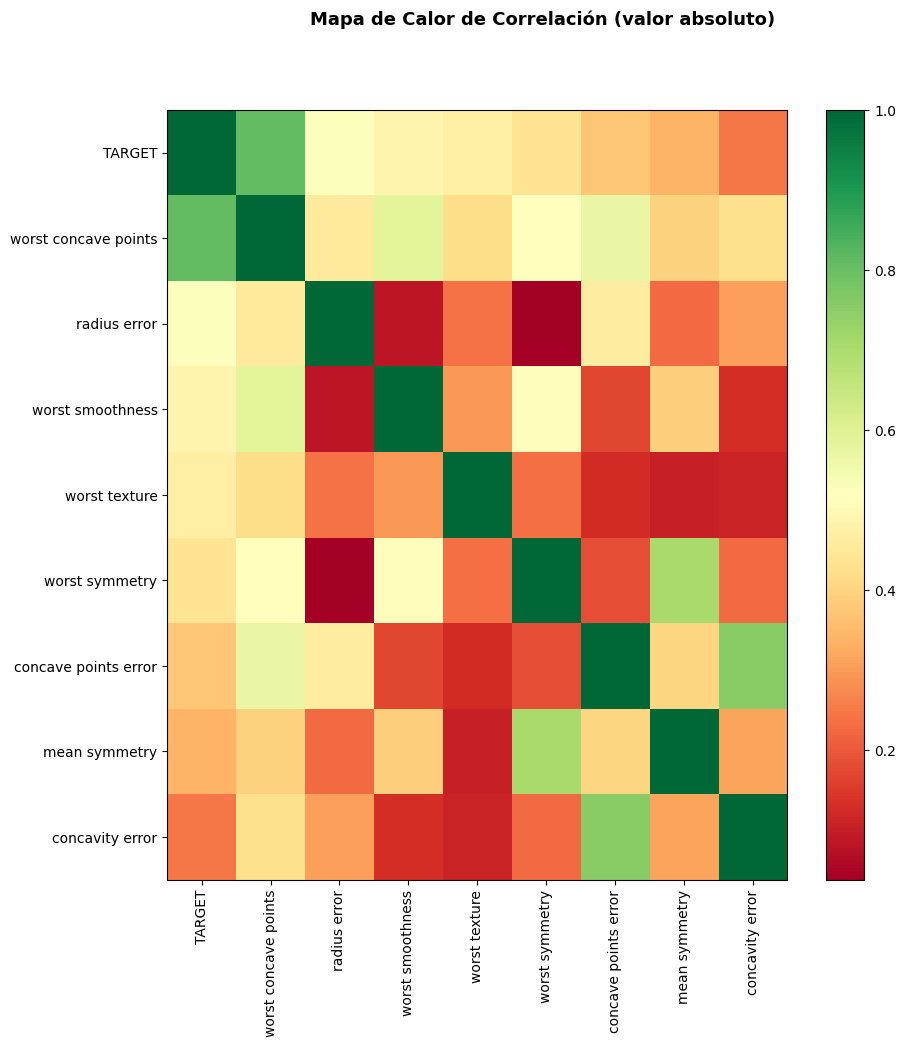

In [25]:
#Calcula la matriz de correlaciones
X2 = X1[li_X2_cols]

print(f"==== Tras la reducción con parejas X2.shape: {X2.shape}")

yX2, yX_corr2, yX_abs_corr2 = matriz_correlaciones(y_train, X2)

s_X3_cols = yX_abs_corr2['TARGET'].sort_values(ascending=False)
li_X3_cols = s_X3_cols.index.tolist()

print("Las Remaining features:")
print(s_X3_cols)
print("---")

li_X3_cols.remove('TARGET')

X3 = X2[li_X3_cols]
print(f"Tras la reducción con parejas X3.shape: {X3.shape}")

yX3, yX_corr3, yX_abs_corr3 = matriz_correlaciones(y_train, X3, se_dibuja=True)

X_train = X3
X_test = X_test_0[li_X3_cols]

    Paso 3.6. Comprobar con un gráfico una de las predictoras que quedan con el target. La predictora
    'worst concave points' tiene una correlación con el target de 0.81 y en el gráfico que generamos vemos
    como hay una buena separación de puntos entre la clase negativa del target (abajo TARGET=0) y la
    clase positiva (arriba TARGET=1).

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Ejemplo de matriz de parejas')

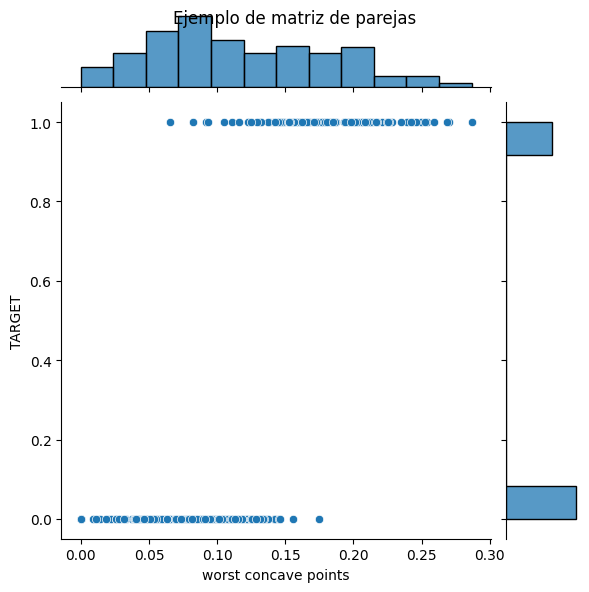

In [26]:
sns.jointplot(yX3, x='worst concave points', y='TARGET', kind='scatter', marginal_kws=dict(bins=12, rug=True))

plt.suptitle('Ejemplo de matriz de parejas')

    Paso 3.7. Dibujar la matriz de gráficos scatter de todas las parejas. La matriz de gráficos scatter
    ayuda a comprender las relaciones que mantienen ente ellas las características. Los puntos azules
    representan target negativos y los verdes target positivos. Los gráficos de la diagonal contienen los
    histogramas de cada característica.

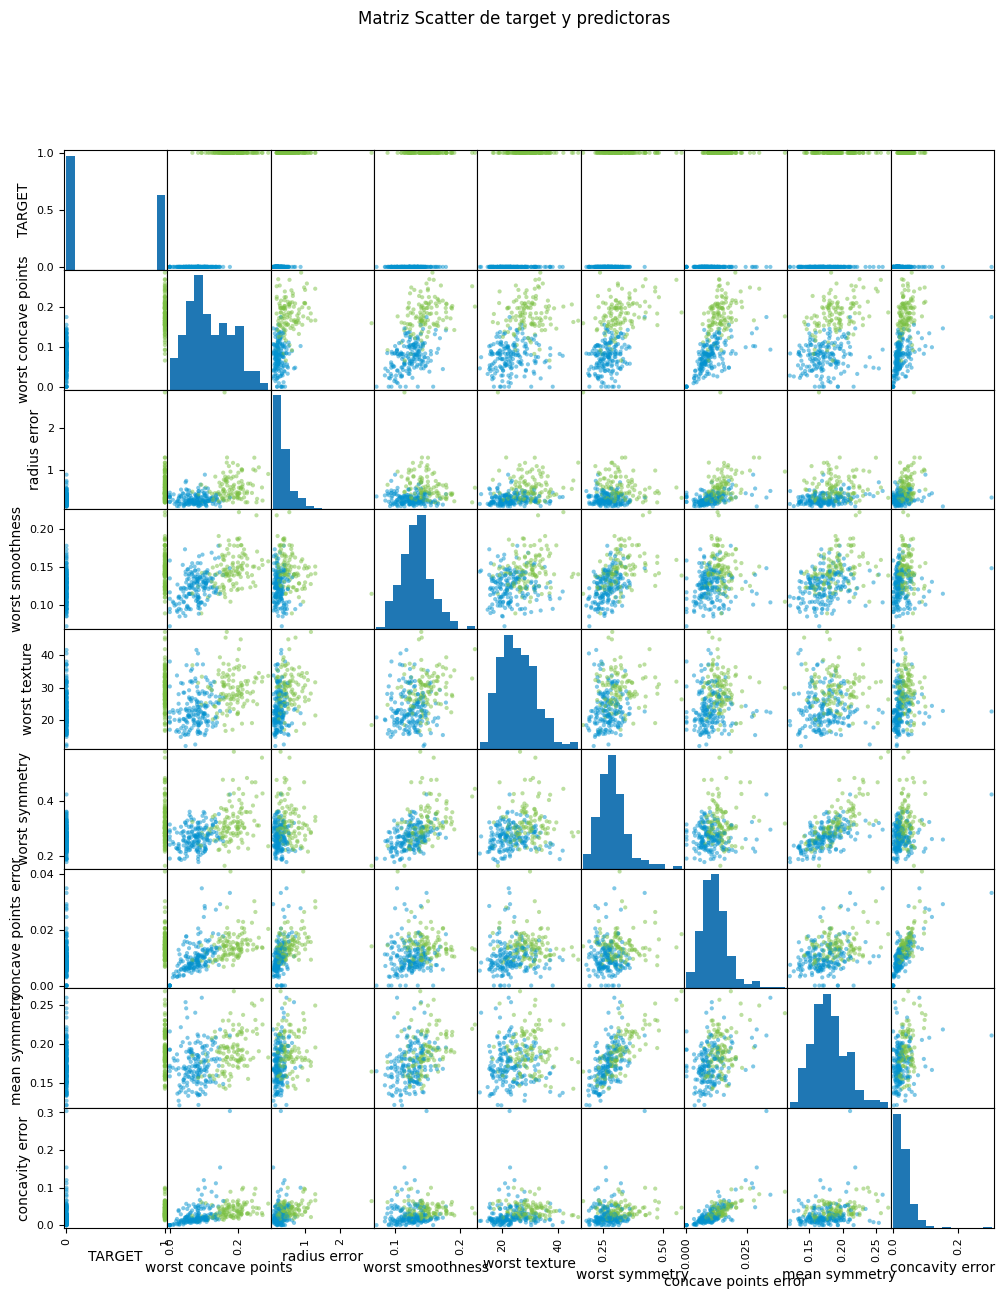

In [27]:

#Definimos un diccionario para mapear las clases a colores
mapa_colores = {0: '#0392cf', 1: '#7bc043'}  # 0: azul, 1: verde

#Asignamos un color a cada punto de datos basado en su clase (TARGET)
colores = yX3['TARGET'].map(lambda x: mapa_colores.get(x))

#Creamos la matriz de dispersión
pd.plotting.scatter_matrix(yX3, 
                           alpha=0.5,  # Transparencia de los puntos
                           color=colores,  # Asignamos los colores definidos
                           figsize=(12, 14),  # Tamaño de la figura
                           diagonal='hist',  # Histograma en la diagonal
                           hist_kwds={'bins': 12})  # Número de bins en los histogramas

#Agregamos un título a la figura
plt.suptitle('Matriz Scatter de target y predictoras')

#Mostramos la figura
plt.show()

    ENTREGA 5: Entrega la matriz de gráficos scatter y responde:


    a) Si estas son las predictoras más influyentes en el target ¿Qué porcentaje son de las 30 que
    teníamos inicialmente?


Habrá que filtrar las predictoras influyentes indentificando las columnas que están siendo mostradas en el gráfico de dispersión y asegurarse de que se encuentren entre las más influyentes (las que tengan más correlación con el target)
Después podremos calcular el porcentaje una vez sepamos cuantas de las 30 predictoras iniciales están incluidas en el gráfico

    b) Entrega el gráfico

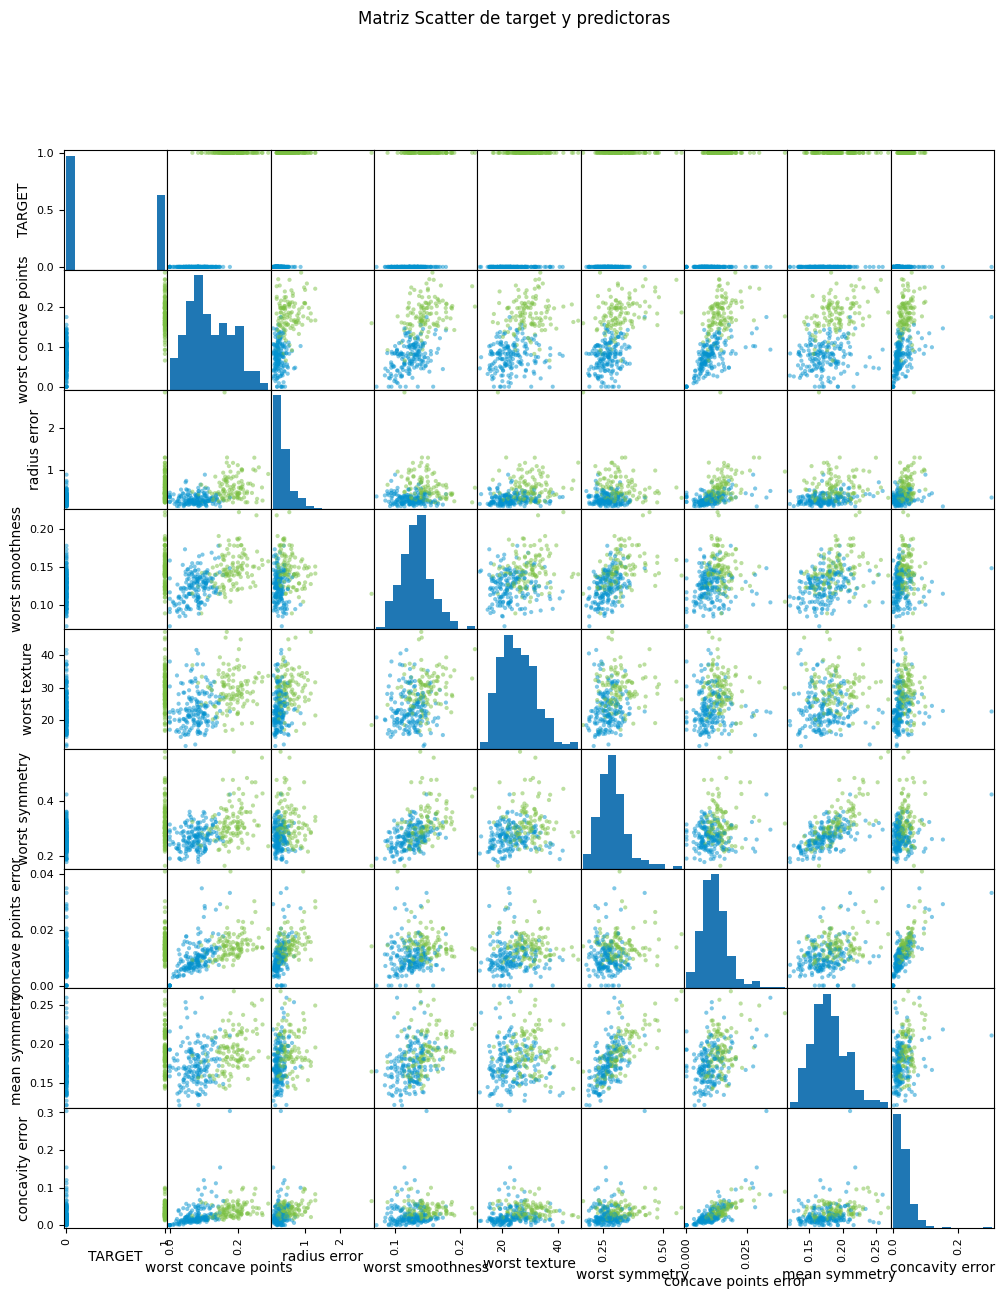

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

#Definimos un diccionario para mapear las clases a colores
mapa_colores = {0: '#0392cf', 1: '#7bc043'}  # 0: azul, 1: verde

#Asignamos un color a cada punto de datos basado en su clase (TARGET)
colores = yX3['TARGET'].map(lambda x: mapa_colores.get(x))

#Creamos la matriz de dispersión
pd.plotting.scatter_matrix(yX3, 
                           alpha=0.5,  # Transparencia de los puntos
                           color=colores,  # Asignamos los colores definidos
                           figsize=(12, 14),  # Tamaño de la figura
                           diagonal='hist',  # Histograma en la diagonal
                           hist_kwds={'bins': 12})  # Número de bins en los histogramas

#Agregamos un título a la figura
plt.suptitle('Matriz Scatter de target y predictoras')

#Mostramos la figura
plt.show()


ACTIVIDAD 4. CREAR DOS MODELOS DE CLASIFICACIÓN.


    Clasificar los datos usando dos diferentes tipos de modelos:
    1. Modelo de Regresión Logística.
    2. GBM – Modelo Boosting por Gradiente
    Paso 4.1. Comprobar el balanceo de los datos. Algunos modelos no se entrenan bien si los datos no
    están balanceados, es decir, si no hay aproximadamente la misma cantidad de valores positivos y
    negativos en el target. Tampoco puede medirse bien el funcionamiento del modelo si los datos de test
    no están balanceados. Pero incluso si al modelo y a sus algoritmos de entrenamiento no les afecta, en
    los datos de entrenamiento debería haber unas proporciones similares de cada clase tanto en los datos
    de train como de test. Haz la comprobación con este código:

In [30]:
print(f"==== X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")

#Calculamos la distribución de clases en el conjunto de entrenamiento
val_counts = y_train.value_counts()
print("Distribución de ejemplos positivos y negativos en train:")
print(val_counts)
print(f"Porcentaje de positivos: {val_counts[1] / len(y_train) * 100:.2f}%")

print(f"==== X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

#Calculamos la distribución de clases en el conjunto de test
val_counts = y_test.value_counts()
print("Distribución de ejemplos positivos y negativos en test:")
print(val_counts)
print(f"Porcentaje de positivos: {val_counts[1] / len(y_test) * 100:.2f}%")

==== X_train.shape: (284, 8), y_train.shape: (284,)
Distribución de ejemplos positivos y negativos en train:
0    172
1    112
Name: count, dtype: int64
Porcentaje de positivos: 39.44%
==== X_test.shape: (285, 8), y_test.shape: (285,)
Distribución de ejemplos positivos y negativos en test:
0    185
1    100
Name: count, dtype: int64
Porcentaje de positivos: 35.09%


 Están más o menos balanceados

    b) ¿Es lógico porque se corresponde con lo que puedes encontrar en la vida real?


Sí, puedes encontrar datos desbalanceados muchas veces

    c) Las proporciones de cada clase en train y test ¿Son similares?


Sí, son parecidas aunque no exactas. En train los positivos son un 39.44 % y en test 35.09 %

    d) Si necesitamos datasets muy balanceados se lo podemos pedir a las funciones que
    particionan los datos. ¿Cómo se llama la técnica que lo realiza? (marca la opción correcta):
    ( ) Estratificación ( ) Validación cruzada. ( ) Ingeniería de características ( ) ADAM

La técnica correcta que lo realiza es la Estratisficación

    Paso 4.2. Dibujar un mapa de calor para el proceso gridsearch de un modelo. Cada modelo tiene sus
    propios hiperparámetros, ajustarlos es otra tarea del proceso de desarrollo de un sistema ML. Vamos
    a usar gridsearch para hacerlo y crea

In [31]:
def plot_2d_grid_search_heatmap(grid_search, grid_params, x_param, y_param, is_verbose=True):
    """
    Dibuja un mapa de calor 2D del proceso de grid search.

    Args:
        grid_search: Instancia de un objeto sklearn.GridSearchCV.
        grid_params: Diccionario de parámetros de grid search.
        x_param: Nombre del parámetro para el eje x del grid.
        y_param: Nombre del parámetro para el eje y del grid.
        is_verbose: Si es True, imprime los mejores resultados.

    Returns:
        grid_search.best_score_: Mejor puntuación encontrada.
        grid_search.best_estimator_: Mejor estimador encontrado.
    """

    grid_params_x = grid_params[x_param]
    grid_params_y = grid_params[y_param]

    df_resul = pd.DataFrame(grid_search.cv_results_)
    ar_scores = np.array(df_resul.mean_test_score).reshape(len(grid_params_y), len(grid_params_x))

    sns.heatmap(ar_scores, annot=True, fmt='.3f',
                xticklabels=grid_params_x, yticklabels=grid_params_y)
    plt.suptitle('Mapa de Calor Grid Search')
    plt.xlabel(x_param)
    plt.ylabel(y_param)

    if is_verbose:
        print("\n==== grid_search.best_score_:")
        print(grid_search.best_score_)
        print("\n==== grid_search.best_estimator_:")
        print(grid_search.best_estimator_)

    plt.show()
    return grid_search.best_score_, grid_search.best_estimator_

    Paso 4.3. Implementar Clasificador con Regresión Logística. Este modelo es sensible a la presencia
    de outliers y a las escalas diferentes de cada predictora.
    Un paso previo al entrenamiento del modelo sería solucionar previamente estos problemas de los
    datos si es que los tienen. En el caso de las escalas deberíamos normalizar os datos antes de entrenar,
    aunque esto tiene el inconveniente de que pierdes significado con la realidad aunque mantengas las
    propiedades estadísticas


==== grid_search.best_score_:
0.9541353383458647

==== grid_search.best_estimator_:
LogisticRegression(C=100, class_weight='balanced', max_iter=200, n_jobs=1,
                   random_state=0, solver='liblinear')


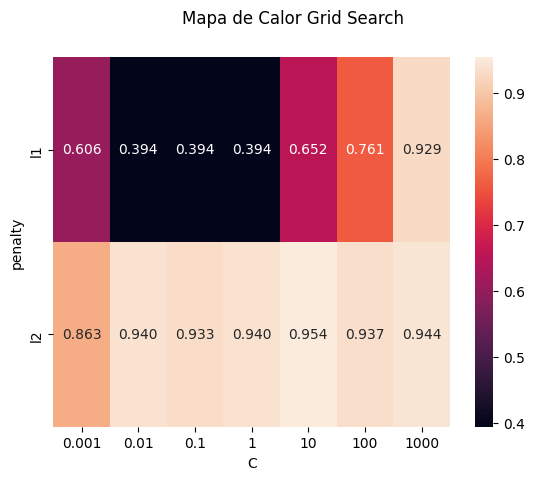

==== Atributos del Clasificador de Regresión Logística:
intercept_:  [-14.77566651]
coef_:  [[ 38.77433504   8.25751779   4.90515909   0.15758735  11.55760641
   -2.85876345  -5.38918075 -10.93910628]]


In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
clf_rl = LogisticRegression(class_weight='balanced', dual=False,
                           fit_intercept=True, intercept_scaling=1, max_iter=200,
                           n_jobs=1, random_state=0, tol=0.0001, verbose=0,
                           warm_start=False, solver='liblinear')  # Cambiado a 'liblinear'

grid_search = GridSearchCV(clf_rl, param_grid, return_train_score=True)
grid_search.fit(X_train, y_train)

best_score_rl, clf_rl = plot_2d_grid_search_heatmap(grid_search, param_grid, 'C', 'penalty')

print("==== Atributos del Clasificador de Regresión Logística:")
print("intercept_: ", clf_rl.intercept_)
print("coef_: ", clf_rl.coef_)


    En el heatmap que genera, el eje x es del parámetro 'C' de los modelos de Regresión Logística:
    representa la inversa de la fuerza de la regularización y debe ser un valor flotante positivo. Como es la
    inversa, a valores más pequeños, mayor fuerza tiene la regularización.
    Este modelo usa dos penalizaciones: una de tipo ℓ2 (para los errores al cuadrado) y una ℓ1 (para el
    valor absoluto de los errores). Solo cuando el hiperparámetro 'C' tiene un alto valor, el ℓ1 y el ℓ2 se
    vuelven parecidos.

    ENTREGA 7: A la vista del mapa de calor de grid-search y de los datos mostrados por consola:


    a) ¿Qué valor de hace que se obtenga una puntuación más alta (el modelo funciona mejor)?


Se puede obtener con los valores de C=100 y penalty='12'

    b) ¿Significa que no se debe usar regularización?


No se debe descartar porque es un componente esencial en muchos modelos de machine learning. Pero en este caso penalty='12' funciona mejor por lo que no es necesario usarlo

    c) Cuando aplicamos restricciones al algoritmo que configura un modelo, elige:
    - ( ) Le damos libertad
    - ( ) Le quitamos libertad
    - ( ) Hacemos que el modelo generalice mejor
    - ( ) Hacemos que el modelo generalice peor
    - ( ) Es mejor hacerlo cuando el modelo es demasiado complejo y tiene overfitting.
    - ( ) Es mejor hacerlo cuando el modelo es demasiado simple y tiene underfitting.


Las respuestas correctas serían:

Le quitamos libertad

Hacemos que el modelo generalice mejor

Es mejor hacerlo cuando el modelo es demasiado complejo y tiene overfitting

    d) ¿Qué parámetros configuran al modelo?

Lo configuran c y penalty

    e) ¿Con qué hiperparámetros se han calculado esos parámetros?

Con c usando los valores [0.001, 0.01, 0.1, 1, 10, 100, 1000] y con penalty usando los valores ['l1','l2']

    Paso 4.3. Implementar el Clasificador GBM. A estos clasificadores no les afectan que los datos estén
    en diferentes escalas porque se basan en árboles a los que las transformaciones lineales no les afecta.
    En el grid search vamos a usar solamente dos hiperparámetros, aunque en la vida real deberíamos
    probar más. 


==== grid_search.best_score_:
0.9471804511278196

==== grid_search.best_estimator_:
GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=2, n_estimators=800,
                           random_state=0)


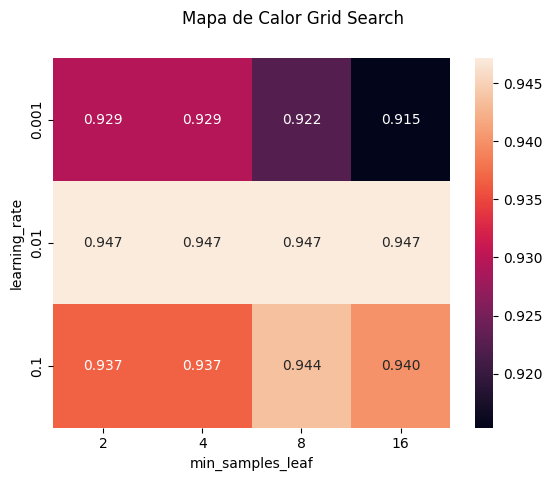

In [35]:
#Definición de los parámetros del modelo de Gradient Boosting
param_grid = {'min_samples_leaf': [2, 4, 8, 16], 'learning_rate': [0.001, 0.01, 0.1]}
clf_gbm = GradientBoostingClassifier(criterion='friedman_mse',
                                    init=None, loss='log_loss', max_features='sqrt',
                                    max_leaf_nodes=None, max_depth=3, warm_start=False,
                                    min_impurity_decrease=0.0, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, n_estimators=800,
                                    random_state=0, subsample=1.0, verbose=0)

#Creación de un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(clf_gbm, param_grid, verbose=0, return_train_score=True)

#Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

#Obtener los mejores resultados y crear un mapa de calor
best_score_gb, clf_gb = plot_2d_grid_search_heatmap(grid_search, param_grid, 'min_samples_leaf', 'learning_rate')

    ENTREGA 8: A la vista del mapa de calor de grid-search:

    a) ¿La mejor puntuación es mejor o peor que la mejor alcanzada por la Regresión Lineal? 


En este caso la regresión logística es mejor porque nos da una mejor puntuación

    b) ¿Y el rango de [mínima puntuación, máxima_puntuación]?


In [41]:
min_score = np.min(grid_search.cv_results_['mean_test_score'])
max_score = np.max(grid_search.cv_results_['mean_test_score'])
print(f"Rango de puntuación: [{min_score:.4f}, {max_score:.4f}]")


Rango de puntuación: [0.9154, 0.9472]


    c) Si cambiamos el valor de la constante RATIO_PARA_TEST de 0.5 a 0.2, particionamos el
    80% de los datos para train. Hazlo y repite la ejecución. ¿Cómo queda ahora la máxima
    puntuación? ¿Mejora a la Regresión Lineal? ¿El intervalo [peor, mejor]?


In [42]:
RATIO_PARA_TEST = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=RATIO_PARA_TEST, random_state=0)


In [43]:
grid_search.fit(X_train, y_train)
min_score = np.min(grid_search.cv_results_['mean_test_score'])
max_score = np.max(grid_search.cv_results_['mean_test_score'])
print(f"Rango de puntuación: [{min_score:.4f}, {max_score:.4f}]")


Rango de puntuación: [0.9319, 0.9714]


    d) ¿Alguno de los dos parámetros no influye cuando se alcanza la mejor puntuación? O dicho
    de otro modo ¿Hay algún valor óptimo de uno de los dos parámetros?

Sí, el valor es óptimo ya que no hay grandes cambios

    e) Cuando usamos GridSearchCV() también debemos usar la función Pipeline() para
    preprocesar los datos antes de hacer la validación cruzada para entrenar el modelo, algo así
    como esto: tuberia_de_operaciones = Pipeline([(‘nombre_preproceso1', preproceso1),
    (‘nombre_modelo', modelo)]) ¿Usamos esto en el código?

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir la lista de operaciones a realizar
tuberia_de_operaciones = Pipeline([
    ('scaler', StandardScaler()),  # Preprocesamiento: Escalado de los datos
    ('modelo', LogisticRegression(class_weight='balanced', dual=False,
                                  fit_intercept=True, intercept_scaling=1, max_iter=200,
                                  n_jobs=1, random_state=0, tol=0.0001, verbose=0,
                                  warm_start=False, solver='liblinear'))
])

# Definir los parámetros para GridSearch
param_grid = {'modelo__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'modelo__penalty': ['l1', 'l2']}  # Nota que usamos 'modelo__' para acceder a los parámetros del modelo dentro del pipeline

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(tuberia_de_operaciones, param_grid, return_train_score=True)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores resultados
best_score_rl = grid_search.best_score_
clf_rl = grid_search.best_estimator_

print("==== Atributos del Clasificador de Regresión Logística:")
print("intercept_: ", clf_rl.named_steps['modelo'].intercept_)
print("coef_: ", clf_rl.named_steps['modelo'].coef_)


==== Atributos del Clasificador de Regresión Logística:
intercept_:  [-0.11016853]
coef_:  [[ 0.34803096  0.39021091  0.34065572  0.33857252  0.1799359   0.02615752
   0.32982693  0.43143396  0.16656183 -0.19933995  0.54807992  0.02609111
   0.42787056  0.39928238 -0.12870858 -0.23897119 -0.09105895  0.09867691
  -0.12048767 -0.29476191  0.49808086  0.52578291  0.46178256  0.44711569
   0.34125778  0.17637404  0.39542047  0.51513454  0.33454388  0.17296273]]


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sí, usamos Pipeline para preprocesar los datos y para entrenar el  modelo de regresión logística

ACTIVIDAD 5. VALIDAR EL MODELO.


    La importancia que tiene cada característica (la información que aporta sobre el problema o la
    influencia que tiene para que el modelo tome sus decisiones) varía de un modelo a otro.
    Paso 5.1. Calcular la matriz de confusión de los dos modelos.

In [56]:
li_clas = ['cla_rl', 'cla_gb']
dfp = pd.DataFrame(index=['TARGET'], data=[y_test]).T
for s_cla in li_clas:
    print("MODELO: " + s_cla)
    print("---------------")
    cla = eval(s_cla)
    y_pred = cla.predict(X_test).astype(int)  # devuelve una clase decisión
    y_score = cla.predict_proba(X_test)      # devuelve el valor de probabilidad
    s_class = "%s_class" % s_cla
    s_proba = "%s_proba" % s_cla
    s_rank = "%s_rank" % s_cla
    dfp[s_class] = y_pred
    dfp[s_proba] = y_score[:, 1]
    dfp[s_rank] = dfp[s_proba].rank(ascending=1).astype(int)
    # Imprime la matriz de confusión y el informe de clasificación
    # desde sklearn.metrics importa la matriz de confusión
    # cm = confusion_matrix(y_test, y_pred)
    # Pandas 'crosstab' muestra mejor esta matriz
    cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predicted'], margins=True)
    print(cm)




MODELO: cla_rl
---------------
Predicted   0   1  All
Reality               
0          62   5   67
1           1  46   47
All        63  51  114
MODELO: cla_gb
---------------
Predicted   0   1  All
Reality               
0          65   2   67
1           2  45   47
All        67  47  114


In [59]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Supongamos que X_train y y_train están definidos previamente

# Entrena el modelo de regresión lineal
cla_rl = LogisticRegression()
cla_rl.fit(X_train, y_train)

# Entrena el modelo GBM
cla_gb = GradientBoostingClassifier()
cla_gb.fit(X_train, y_train)

# Crear DataFrame con std de X_train
dfimp = pd.DataFrame(np.std(X_train, axis=0), columns=['std'])

# Agregar coeficientes de regresión lineal
dfimp['coef'] = cla_rl.coef_.ravel()

# Calcular lr_sign_imp
dfimp['lr_sign_imp'] = np.std(X_train, axis=0) * cla_rl.coef_.ravel()

# Calcular lr_imp
dfimp['lr_imp'] = np.abs(dfimp['lr_sign_imp'])

# Agregar importancias del modelo GBM
dfimp['gb_imp'] = pd.Series(cla_gb.feature_importances_, index=X_train.columns)

# Añadir una columna para la correlación con el target
# Asegúrate de que `s_X3_cols` esté definido correctamente
dfimp['target_corr'] = s_X3_cols.drop('TARGET')

# Rango desde altos a bajos valores de importancia
dfimp['lr_rank'] = dfimp['lr_imp'].rank(ascending=False)
dfimp['gb_rank'] = dfimp['gb_imp'].rank(ascending=False)
dfimp['target_corr_rank'] = dfimp['target_corr'].rank(ascending=False)

# Ordenar valores y mostrar los 20 primeros
dfsort = dfimp.sort_values('target_corr_rank', ascending=True)
print(dfsort.iloc[:20, :].to_string())

# Selección de las columnas principales
cols_top = dfsort.index[:7]  # Primeras filas en X e Y
print("[y_test, X_test]")
yX_test = pd.concat([y_test.iloc[-10:], X_test[cols_top].iloc[-10:, :]], axis=1)
yX_test = yX_test.rename(columns={0: 'TARGET'})
print(yX_test.to_string())


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                             std    coef  lr_sign_imp  lr_imp      gb_imp  target_corr  lr_rank  gb_rank  target_corr_rank
worst concave points      0.0652  0.3141       0.0205  0.0205  4.1068e-01       0.8115     16.0      1.0               1.0
radius error              0.2841 -0.0780      -0.0222  0.0222  5.5114e-03       0.5254     15.0     12.0               2.0
worst smoothness          0.0226  0.1039       0.0023  0.0023  1.0721e-03       0.4883     22.0     22.0               3.0
worst texture             6.0939  0.3208       1.9552  1.9552  2.6619e-02       0.4716      6.0      5.0               4.0
worst symmetry            0.0629  0.3060       0.0193  0.0193  2.9996e-05       0.4374     17.0     29.0               5.0
concave points error      0.0059  0.0192       0.0001  0.0001  1.8293e-06       0.3730     28.0     30.0               6.0
mean symmetry             0.0274  0.1104       0.0030  0.0030  8.3984e-03       0.3391     20.0     11.0               7.0
concavity error 

ENTREGA 9: Una vez ejecutado el código:

    a) Entrega una captura de la matriz de confusión del modelo de Regresión Lineal.


Matriz de Confusión: Regresión Lineal
[[63  4]
 [ 2 45]]


Text(0.5, 1.0, 'Matriz de Confusión: Regresión Lineal')

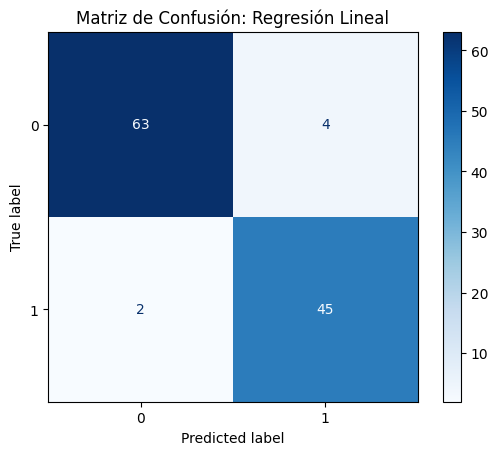

In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión para Regresión Lineal
print("Matriz de Confusión: Regresión Lineal")
y_pred_rl = cla_rl.predict(X_test)  # Predicciones del modelo
cm_rl = confusion_matrix(y_test, y_pred_rl)  # Generar matriz de confusión
print(cm_rl)

# Visualizar matriz de confusión (gráfico)
disp_rl = ConfusionMatrixDisplay(confusion_matrix=cm_rl, display_labels=cla_rl.classes_)
disp_rl.plot(cmap="Blues")
disp_rl.ax_.set_title("Matriz de Confusión: Regresión Lineal")



    b) Lo mismo para el modelo GBM.


Matriz de Confusión: GBM
[[65  2]
 [ 1 46]]


Text(0.5, 1.0, 'Matriz de Confusión: GBM')

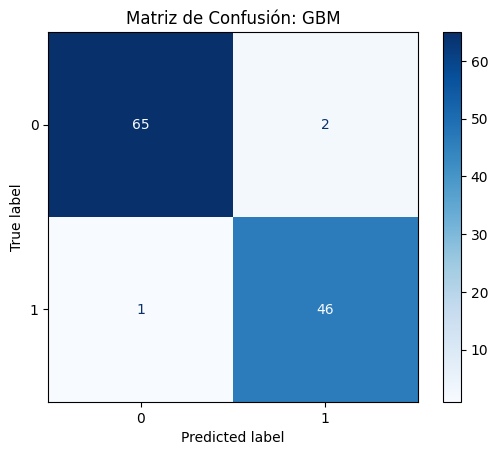

In [62]:
#Matriz de confusión para GBM
print("Matriz de Confusión: GBM")
y_pred_gb = cla_gb.predict(X_test)  # Predicciones del modelo
cm_gb = confusion_matrix(y_test, y_pred_gb)  # Generar matriz de confusión
print(cm_gb)

#Visualizar matriz de confusión (gráfico)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=cla_gb.classes_)
disp_gb.plot(cmap="Blues")
disp_gb.ax_.set_title("Matriz de Confusión: GBM")


    Paso 5.2. Calcular el informe de importancia de las características de los dos modelos. (Ten en
    cuenta que el código continúa dentro del bucle y se realizará para cada modelo)

In [69]:
print("\nInforme de Clasificadores:")
print(classification_report(y_test, y_pred))

if s_cla == 'cla_rl':
    y_score_lr = y_score.copy()
elif s_cla == 'cla_gb':
    y_score_gb = y_score.copy()
else:
    raise ValueError("Error: Modelo desconocido.")  # Lanza una excepción en lugar de usar break

#Muestra las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame `dfp`:")
print(dfp.tail(10).to_string())  # Corregido: .to_string() (no .to_String())



Informe de Clasificadores:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Últimas filas del DataFrame `dfp`:
     TARGET  cla_rl_class  cla_rl_proba  cla_rl_rank  cla_gb_class  cla_gb_proba  cla_gb_rank
85        1             1        1.0000          102             1        0.9996           94
504       0             0        0.0023           14             0        0.0056           56
400       1             1        1.0000           92             1        0.9996          109
518       0             0        0.2384           58             0        0.0041           55
263       1             1        0.8979           72             1        0.9920           73
213       1             1        0.8930      

ENTREGA 10: Una vez ejecutado el código:


    a) Entrega una captura del informe del modelo de Regresión Lineal.


    b) Lo mismo para el modelo GBM.


Están ambos arriba

    Paso 5.3. Dividir los datos en Bins percentiles, es decir, definir 10 grupos (bins) uno para cada
    posible intervalo de scores, y ver cuantos datos caen dentro de cada bin. El rango de puntuaciones
    estará limitada por 'score_min' a 'score_max'

ENTREGA 11: Ejecuta el código y:
    a) Entrega una captura de los datos que genera

In [82]:
import pandas as pd
import numpy as np

#Simula datos (ajusta según tus necesidades)
dfp = pd.DataFrame({
    'TARGET': np.random.choice([0, 1], size=100),  # Columnas objetivo con valores binarios
    'cla_rl_class_proba': np.random.rand(100),    # Probabilidades simuladas para clasificador RL
    'cla_rl_class_rank': np.arange(100),          # Rango para RL
    'cla_gb_class_proba': np.random.rand(100),    # Probabilidades simuladas para clasificador GBM
    'cla_gb_class_rank': np.arange(100)           # Rango para GBM
})

#Lista de clasificadores
li_clas = ['cla_rl', 'cla_gb']

#Variables para los bins
RANGO_BINS = 10
rango_cols = ['i bin', 'i min bin', 'i max bin', 'score min', 'score max', 'bin_cnt', 'pos_cnt', 'pos_rate']
rango_cols2 = ['i_bin', 'score_min', 'score_max', 'tpr', 'fpr', 'fnr', 'tpr', 'tn', 'fp', 'fn', 'tp']

print(dfp.shape)
len_test = dfp.shape[0]
len_bin = int(len_test / RANGO_BINS)

#Procesamiento principal
for cla in li_clas:
    i_min_bin = 0
    i_max_bin = 0
    dfr = pd.DataFrame(columns=rango_cols)
    dfr2 = pd.DataFrame(columns=rango_cols2)

    s_class = f"{cla}_class"
    s_proba = f"{s_class}_proba"
    s_rank = f"{s_class}_rank"

    #Verificar columnas en dfp, si no existen, generarlas
    if s_rank not in dfp.columns or s_proba not in dfp.columns:
        print(f"Advertencia: Las columnas '{s_rank}' o '{s_proba}' no existen en el DataFrame. Generando valores predeterminados.")
        dfp[s_proba] = np.random.rand(len(dfp))  # Probabilidades aleatorias
        dfp[s_rank] = np.arange(len(dfp))        # Rankings secuenciales

    #Cálculo por bins
    for i in range(RANGO_BINS):
        if i == RANGO_BINS - 1:
            i_max_bin = len_test
        else:
            i_max_bin += len_bin
        
        #Rango usado para cada bin de puntuaciones
        df_rng = dfp[(dfp[s_rank] >= i_min_bin) & (dfp[s_rank] < i_max_bin)]
        score_min = np.min(df_rng[s_proba]) if not df_rng.empty else 0
        score_max = np.max(df_rng[s_proba]) if not df_rng.empty else 0
        bin_cnt = df_rng.shape[0]
        pos_cnt = len(df_rng[df_rng['TARGET'] == 1])
        pos_rate = pos_cnt / bin_cnt if bin_cnt > 0 else 0

        #Rango usado para todos los bins hasta i_max_bin
        df_rng_0 = dfp[dfp[s_rank] < i_max_bin]
        df_rng_1 = dfp[dfp[s_rank] >= i_max_bin]

        #Targets positivos
        tp = len(df_rng_1[df_rng_1['TARGET'] == 1])
        fn = len(df_rng_0[df_rng_0['TARGET'] == 1])
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Tasa de verdaderos positivos
        fnr = 1 - tpr  # Tasa de falsos negativos

        #Targets negativos
        tn = len(df_rng_0[df_rng_0['TARGET'] == 0])
        fp = len(df_rng_1[df_rng_1['TARGET'] == 0])
        neg = tn + fp
        fpr = fp / neg if neg > 0 else 0  # Tasa de falsos positivos
        tnr = 1 - fpr  # Tasa de verdaderos negativos

        #DataFrame para resumen de estadísticas por bin
        row = [i, i_min_bin, i_max_bin, score_min, score_max, bin_cnt, pos_cnt, pos_rate]
        dfr.loc[i] = row

        #DataFrame para estadísticas ROC por bin
        row2 = [i, score_min, score_max, tpr, fpr, fnr, tpr, tn, fp, fn, tp]
        dfr2.loc[i] = row2

        i_min_bin = i_max_bin  # Preparar la siguiente iteración

    #Asignar resultados
    if cla == 'cla_rl':
        dfr_lr = dfr.copy()
        dfr2_lr = dfr2.copy()
    elif cla == 'cla_gb':
        dfr_gb = dfr.copy()
        dfr2_gb = dfr2.copy()

#Resultados
print("==== Resultados de contadores estadísticos positivos por bin")
print("Estadísticas de Regresión Logística:")
print(dfr_lr.to_string())
print()

print("Estadísticas de GBM:")
print(dfr_gb.to_string())
print()

print("---")
print("Estadísticas globales en el test set:")
pos_cnt = len(dfp[dfp['TARGET'] == 1])
pos_rate = pos_cnt / len_test
print("pos_cnt", pos_cnt)
print("total filas", len_test)
print("pos_rate", pos_rate)


(100, 5)
==== Resultados de contadores estadísticos positivos por bin
Estadísticas de Regresión Logística:
   i bin  i min bin  i max bin  score min  score max  bin_cnt  pos_cnt  pos_rate
0    0.0        0.0       10.0     0.1646     0.9489     10.0      4.0       0.4
1    1.0       10.0       20.0     0.0013     0.9147     10.0      6.0       0.6
2    2.0       20.0       30.0     0.0628     0.8775     10.0      5.0       0.5
3    3.0       30.0       40.0     0.2354     0.9392     10.0      2.0       0.2
4    4.0       40.0       50.0     0.1200     0.9382     10.0      6.0       0.6
5    5.0       50.0       60.0     0.3605     0.9923     10.0      3.0       0.3
6    6.0       60.0       70.0     0.0573     0.8506     10.0      6.0       0.6
7    7.0       70.0       80.0     0.1669     0.9499     10.0      4.0       0.4
8    8.0       80.0       90.0     0.0557     0.9998     10.0      5.0       0.5
9    9.0       90.0      100.0     0.0372     0.9635     10.0      4.0       0.4

E

    Paso 5.4. Dibujar el ratio de clases positivas por cada bin. Con frecuencia necesitamos que los
    modelos den resultados consistentes cuando los valores de los scores aumentan. Para este tipo de
    análisis, preferimos modelos que tengan bins de scores que se incrementen de manera monótona (que
    el siguiente de la derecha sea mayor que el anterior de su izquierda).


    ENTREGA 12: Ejecuta el código y:
    a) Entrega una captura de los gráficos datos que imprime.


C:\Users\juan_\AppData\Local\Temp\ipykernel_62364\2797986546.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


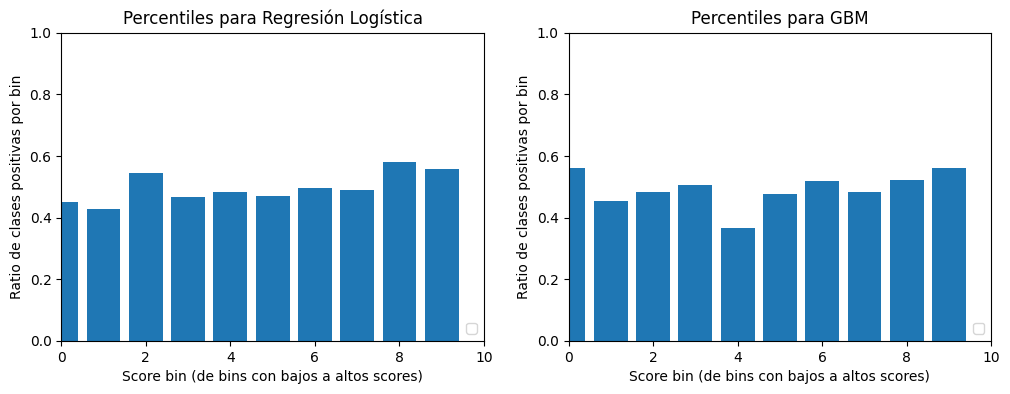

In [93]:
import matplotlib.pyplot as plt

#Títulos para las gráficas
s_titulos = ['Regresión Logística', 'GBM']

#Creamos una figura de tamaño 12x4
plt.figure(figsize=(12, 4))

#Iteramos sobre las clases y sus índices
for i, s_cla in enumerate(li_clas):
    # Obtenemos el título correspondiente a la clase
    s_titulo = s_titulos[i]

    #Seleccionamos el DataFrame correcto según la clase
    if s_cla == 'cla_rl':
        dfr = dfr_lr
        dfr2 = dfr2_lr
    elif s_cla == 'cla_gb':
        dfr = dfr_gb
        dfr2 = dfr2_gb
    else:
        print(f'Error: Clase desconocida "{s_cla}"')
        continue  # Saltamos esta iteración del bucle

    #Verificamos que las columnas necesarias existan en el DataFrame
    required_columns = ['i_bin', 'pos_rate']
    if not all(col in dfr.columns for col in required_columns):
        print(f"Error: Columnas faltantes en el DataFrame para la clase {s_cla}: {dfr.columns}")
        continue  # Saltamos esta iteración del bucle

    #Creamos un subplot en la posición correspondiente
    plt.subplot(1, 2, i + 1)

    #Creamos un gráfico de barras
    plt.bar(dfr['i_bin'], dfr['pos_rate'])

    #Agregamos título y etiquetas a los ejes
    plt.title('Percentiles para ' + s_titulo)
    plt.xlabel('Score bin (de bins con bajos a altos scores)')
    plt.ylabel('Ratio de clases positivas por bin')

    #Agregamos una leyenda en la esquina inferior derecha
    plt.legend(loc="lower right")

    #Configuramos los límites de los ejes
    plt.xlim([0, RANGO_BINS])
    plt.ylim([0.0, 1])

#Mostramos la figura
plt.show()


    b) ¿Hay algún modelo de los que hemos usado que tenga un comportamiento monótono?

No hay un comportamiento monótono en ningún modelo

    Paso 5.5. Imprimir datos estadísticos de cada bin y dibujar las curvas ROC y precisión contra recall.
    Aunque todos estos términos a la mayoría no os digan nada, son herramientas que veremos en
    próximas unidades y que se utilizan para saber como se comporta de bien o mal un modelo

In [94]:
print("==== Resultados de estadísticas ROC por bin")
print("Estadísticas de Regresión Logística:")
print(dfr2_lr.to_string())
print()
print("Estadísticas de GBM")
print(dfr2_gb.to_string())

==== Resultados de estadísticas ROC por bin
Estadísticas de Regresión Logística:
   i_bin  score_min  score_max     tpr     fpr     fnr     tnr     tn     fp     fn     tp
0    0.0     0.0188     0.9953  0.8968  0.8775  0.1032  0.1225   62.0  444.0   51.0  443.0
1    1.0     0.0149     0.9733  0.7996  0.7510  0.2004  0.2490  126.0  380.0   99.0  395.0
2    2.0     0.0151     0.9998  0.7004  0.6700  0.2996  0.3300  167.0  339.0  148.0  346.0
3    3.0     0.0174     0.9915  0.6194  0.5791  0.3806  0.4209  213.0  293.0  188.0  306.0
4    4.0     0.0170     0.9851  0.5324  0.4881  0.4676  0.5119  259.0  247.0  231.0  263.0
5    5.0     0.0045     0.9947  0.4352  0.3814  0.5648  0.6186  313.0  193.0  279.0  215.0
6    6.0     0.0142     0.9964  0.3117  0.2589  0.6883  0.7411  375.0  131.0  340.0  154.0
7    7.0     0.0278     0.9900  0.2085  0.1542  0.7915  0.8458  428.0   78.0  391.0  103.0
8    8.0     0.0081     0.9939  0.1073  0.0830  0.8927  0.9170  464.0   42.0  441.0   53.0
9    9.0 

In [95]:
def plot_roc_y_precision_recall(y_true, y_score, modelo=None):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)  # Calcula ROC y AUC usando FPR y TPR
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (AUC=%0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ratio Falsos Positivos')
    plt.ylabel('Ratio True Positivos')
    titulo = 'Curva ROC'
    if modelo != None:
        titulo = titulo + ' de ' + modelo.__class__.__name__
    plt.title(titulo)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='orange', where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precisión')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Curva Precisión-Recall')
    plt.grid(True)
    plt.subplots_adjust(0.125, 0.1, 0.9, 0.9, 0.5, 0.2)
    plt.show()


MODELO: cla_rl
---------------


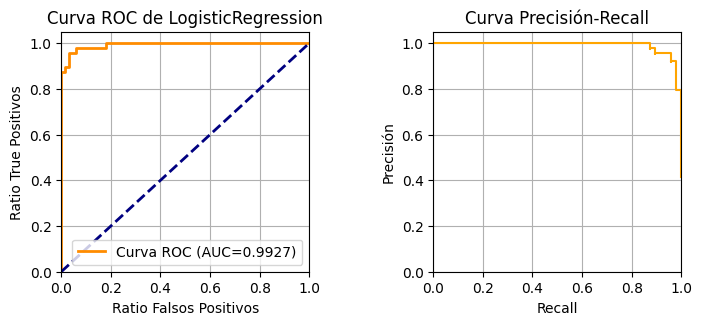


MODELO: cla_gb
---------------


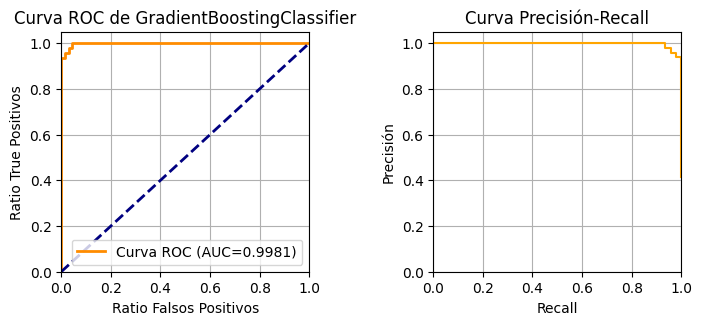

In [96]:
for s_cla in li_clas:
    print("MODELO: " + s_cla)
    print("---------------")
    cla = eval(s_cla)
    y_pred = cla.predict(X_test).astype(int)
    y_score = cla.predict_proba(X_test)
    plot_roc_y_precision_recall(y_test, y_score[:, 1], cla)
    print()


Por resumir lo que hemos hecho en esta práctica que ha consistido en realizar algunas tareas típicas en
la preparación de un modelo de ML:
• Usando técnicas de selección de características al final hemos usado 9 de las 30 iniciales.
• Hemos creado sos modelos de clasificación (Regresión logística y GBM) y hemos encontrado
sus hiperparámetros óptimos usando GridSearchCV.
• Hemos calculado un ranking de importancia de las características para cada modelo.
• Hemos medido y comparado ambos con la curva ROC y la de precisión vs recall.
• Hemos cambiado TEST_SIZE_RATIO=0.2 y eso mejora a GBM porque lo vuelve más estable

ACTIVIDAD 6. HAZ ALGO PARECIDO CON OTRO DATASET

    Añade una entrada en el fichero alumnos que está accesible desde este enlace con tus credenciales de
    Conselleria. El fichero tiene una serie de características que te explico a continuación:
    • NOMBRE: las primeras 3 letras de tu nombre y las primeras 3 de tus apellidos.
    • EDAD: los años que tienes.
    • PESO_KG: tu peso aproximado.
    • ALTURA_CM: la altura aproximada en centímetros.
    • NUM_HERMANOS: el número de hermanos o hermanas que tienes.
    • HS_DEPORTE: horas semanales que dedicas a actividades deportivas de cualquier tipo.
    • HS_VIDEOJUEGOS: horas semanales que dedicas a jugar videojuegos.
    • TALLA_PIE: número de pie que usas cuando compras calzado.
    • GENERO_MASCULINO: un 1 si es tu género biológico o 0 en otro caso.
    U01 PRÁCTICA 1 Página 13 / 13
    • MIOPÍA: la cantidad de diotrías de miopía que tienes. Si no tienes, un 0.
    • LLEVAS_GAFAS: Un 1 si utilizas gafas o lentillas y 0 en otro caso.
    • TIENE_ALERGIAS: un 1 si eres alérgico a alguna cosa o un 0 en otro caso.
    • PIEZAS_FRUTA_DÍA: la cantidad aproximada de piezas de fruta que sueles comer cada día.
    • CAFÉS_DÍA: la cantidad de cafés aproximada que sueles tomar cada día.
    - Cuando todos hayamos rellenado el fichero, puedes descargarlo como un .csv y cargarlo.
    - Haz algún procesamiento como quitar la columna nombre al dataset. Escoge una columna que te
    sirva para clasificar a los alumnos usando el resto de columnas. Por ejemplo: tiene_alergias,
    lleva_gafas, o incluso una numérica podrías transformarla en dos clases CAFÉS_DÍA si es mayor de 0
    es SI (1) y si es cero es No (0). O tomas poco entre 0 y 2 y muchos entre 3 o más. Lo que se te ocurra.
    - Indica el target que has elegido y transforma los datos si necesitas hacerlo.
    - Haz un procesamiento similar al que hemos realizado al dataset original:
    • Estudia si puedes eliminar características para el clasificador.
    • Crea dos modelos clasificadores (pueden ser los mismos).
    • Configura sus hiperparámetros (al tener muy pocos datos posiblemente tengan overfitting).
    • Estudia el resultado de compararlos y sus curvas ROC, su AUC y precisión-recall

    ENTREGA 13: Entrega un informe con los gráficos que generes y los resultados que obtengas, el
    código de las anteriores actividades lo podrás reutilizar casi en su totalidad haciendo pocos cambios
    para que funcione con los nuevos datos. Llama al archivo saa_u01_p01_e13_<tusIniciales>.py

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados para Logística de Regresión
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.50      0.67         4

    accuracy                           0.82        11
   macro avg       0.89      0.75      0.77        11
weighted avg       0.86      0.82      0.80        11

ROC AUC: 0.9642857142857143
Resultados para Random Forest
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.00      0.00      0.00         4

    accuracy                           0.64        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.40      0.64      0.49        11

ROC AUC: 0.26785714285714285


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

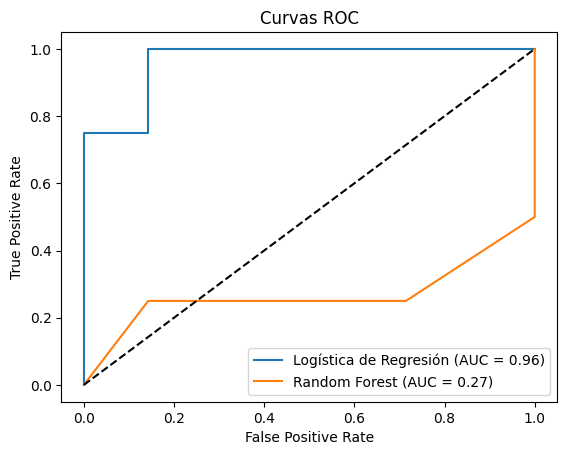

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc



#Dataset (Hay que decirle que empieza en la columna 1 y que usa delimitador ;)
datos = pd.read_csv("alumnos.csv", encoding='ISO-8859-1', header=0, sep=';')

#Convertir las columnas que pueden tener comas como separador decimal
datos['MIOPIA'] = datos['MIOPIA'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)

#Convertir a tipo float las columnas relevantes
datos['MIOPIA'] = datos['MIOPIA'].astype(float)


#Quitar columna Nombre del dataset
datos = datos.drop(columns=['NOMBRE'])

datos.columns = datos.columns.str.strip()  # Elimina espacios al principio y al final

#Columna para clasificar target (Cafés)
datos['CAFES_CLASE'] = datos['CAFES_DIA'].apply(lambda x: 1 if x >= 3 else 0)

#Separar variables x y
x = datos.drop(columns=['CAFES_DIA', 'CAFES_CLASE'])
y = datos['CAFES_CLASE']

#Dividir en entrenamiento y prueba (20 % para prueba)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


#Modelo de regresión logística
param_grid_lr = {'C': [0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=2, scoring='roc_auc')
grid_lr.fit(X_train, y_train)


    
#Modelo Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc')
grid_rf.fit(X_train, y_train)


for model, name in zip([grid_lr, grid_rf], ['Logística de Regresión', 'Random Forest']):
    y_pred = model.best_estimator_.predict(X_test)
    y_proba = model.best_estimator_.predict_proba(X_test)[:, 1]
    print(f"Resultados para {name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    
    
     #Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

#Graficar todas las curvas ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.show()




#En definitiva podría añadir más datos para que los modelos puedan trabajar mejor o también aplicar diferentes
#técnicas, balanceo, probar Xgboost, Gradient y muchas otras opciones
